In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
import itertools

In [ ]:
twitter=pd.read_csv('/content/twitter_combined.csv')

In [ ]:
twitter= twitter[:30000]
twitter

214328887   34428380
0       17116707   28465635
1      380580781   18996905
2      221036078  153460275
3      107830991   17868918
4      151338729  222261763
...          ...        ...
29995   17567533   23962323
29996   16889060  449462207
29997   39582797   15684633
29998   26858764   19767193
29999   73975665   11178672

[30000 rows x 2 columns]

In [ ]:
G=nx.Graph()

In [ ]:
for index, row in twitter.iterrows():
 source_node= row['214328887']
 target_node = row['34428380']
 edge = (source_node, target_node)
 G.add_edges_from([edge])

In [ ]:
nx.info(G)

'Graph with 4740 nodes and 29982 edges'

In [ ]:
# plt.figure(figsize=(16,10))
# nx.draw(G,with_labels=True, pos=nx.shell_layout(G))

In [ ]:
max(G,key=G.degree)

40981798

In [ ]:
degc=nx.degree_centrality(G)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[(40981798, 0.03608356193289723),
 (43003845, 0.0341844270943237),
 (22462180, 0.03334036716606879),
 (34428380, 0.03291833720194134),
 ('16038438', 0.028698037560666807),
 ('279787626', 0.02532179784764718),
 ('153226312', 0.02489976788351973),
 (18996905, 0.024477737919392277),
 (27633075, 0.023000633044946192),
 (31331740, 0.023000633044946192),
 (17868918, 0.022789618062882464),
 ('100581193', 0.022789618062882464),
 ('358775055', 0.022789618062882464),
 ('463952369', 0.022789618062882464),
 ('134940306', 0.022367588098755012),
 (83943787, 0.022156573116691284),
 (16038438, 0.021523528170500104),
 (8088112, 0.02131251318843638),
 ('461410856', 0.02110149820637265),
 (3359851, 0.02110149820637265),
 (28465635, 0.0206794682422452),
 (151338729, 0.0206794682422452),
 ('274153775', 0.0206794682422452),
 (117674417, 0.0206794682422452),
 (19493072, 0.02046845326018147),
 ('394263193', 0.020257438278117747),
 (116036694, 0.020257438278117747),
 ('236184723', 0.02004642329605402),
 ('2704

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
from networkx import edge_betweenness_centrality as betweenness

comp = girvan_newman(G)

In [ ]:
import networkx.algorithms.community as nx_comm
community = nx_comm.kernighan_lin_bisection(G)

In [ ]:
nodes_list = []
for com in community:
  nodes_list.append(list(com))

In [ ]:
len(nodes_list)

2

In [ ]:
nodes_list

[[14876672,
  '55113 997',
  4169740,
  '20106337',
  '374949999',
  229425177,
  901147,
  '208442526',
  '95980722',
  '15693493',
  5693493,
  69,
  '795536 11',
  '258203336',
  '4841921 9',
  '14239780',
  72818790,
  '120599128',
  '8409452 1',
  15122553,
  '369130833',
  246456451,
  '1478471 6',
  '19493072',
  37699718,
  '63273064',
  '53222305',
  42164376,
  187744415,
  123371682,
  4620451,
  6774950,
  1179815,
  316604582,
  26173611,
  70492333,
  '20427778',
  '11627 495',
  '382823424',
  337952973,
  '5678622 1',
  '157652825',
  '1117341 4',
  469024995,
  '155976326',
  '42057383',
  16612,
  '430313102',
  59588845,
  4505838,
  '5066391 1',
  64209144,
  4219131,
  292970754,
  262,
  '222178782',
  745742,
  42950930,
  14647570,
  286999,
  16736535,
  4677919,
  200884513,
  259842341,
  2040102,
  98603,
  274153775,
  '24595743',
  51274038,
  '216299334',
  340402493,
  16721,
  '105259389',
  188809568,
  '16876667',
  290660713,
  83943787,
  '83417972'

In [ ]:
cliques = list(nx.find_cliques(G))
[clique for clique in cliques if len(clique) > 2]

[]

In [ ]:
# for i in range(2,12):
#   k_core_g = nx.k_core(G, i)
#   print(i)
#   plt.figure(3,figsize=(10,6)) 
#   nx.draw(k_core_g, with_labels=True)
#   plt.show()

In [ ]:
nx.density(G)

0.0026694730768922568

Link Prediction 

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-geometric

import torch_geometric
print(torch_geometric.__version__)

1.12.1+cu113
     |████████████████████████████████| 7.9 MB 6.2 MB/s 
     |████████████████████████████████| 3.5 MB 6.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 7.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=896a330308b1c65eeee4059f4ce11c59ba67a5b17589ba05798253d58d42591a
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
2.1.0


In [ ]:
!pip install gensim==3.8.3
from gensim.models import Word2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Node2Vec
!pip install -U node2vec
from node2vec import Node2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=4f85580a3c01c2786d517655442c45e80b0088b1bd56f891cebb09d2fff3d358
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.utils.convert import from_networkx
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
degree_cent = nx.degree_centrality(G)

In [ ]:
pgr=nx.pagerank(G)

In [ ]:
proportion_edges = 0.2
edge_subset = random.sample(G.edges(), int(proportion_edges * G.order()))

g_train = G.copy()
g_train.remove_edges_from(edge_subset)

In [ ]:
N,K = g_train.order(), g_train.size()

In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(K - edge_subset_size))

Deleted edges = 948
Remaining edges = 28086


Jaccard Similarity

In [ ]:
prediction_jaccard = list(nx.jaccard_coefficient(g_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [ ]:
score_jaccard[:10]

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [ ]:
label_jaccard[:10]

(False, False, False, False, False, False, False, False, False, False)

In [ ]:
fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

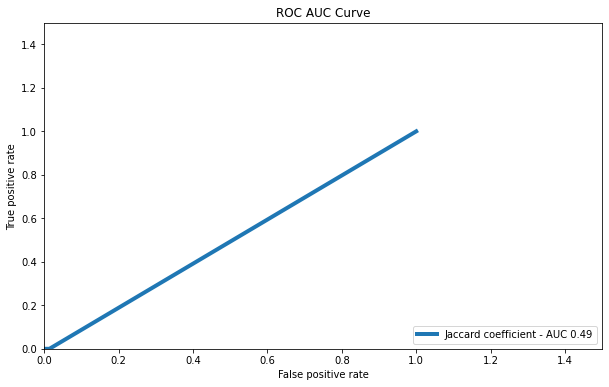

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.5])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

Adamic Adar Similarity

In [ ]:
prediction_adamic = list(nx.adamic_adar_index(g_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [ ]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

Preferrential Attachment 

In [ ]:
prediction_pref = list(nx.preferential_attachment(g_train))
score_pref , label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [ ]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

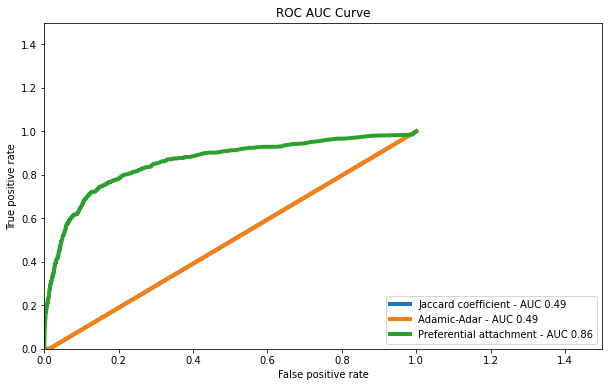

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.5])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
optimal_idx = np.argmax(tpr_pref - fpr_pref)
optimal_threshold = thresholds_pref[optimal_idx]
print("Optimal threshold =", optimal_threshold)

Optimal threshold = 224
